# Tìm hiểu về bộ dữ liệu dự đoán bệnh tiểu đường
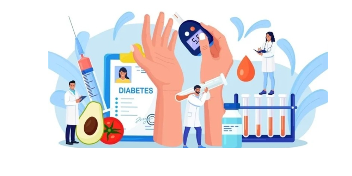


In [219]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import LabelEncoder,StandardScaler

from imblearn.over_sampling import SMOTE ,RandomOverSampler

from sklearn.metrics import accuracy_score,confusion_matrix,classification_report,auc,roc_auc_score,recall_score,precision_score, f1_score
from sklearn.model_selection import GridSearchCV

from sklearn.model_selection import KFold,train_test_split

from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC



# Thông tin bộ dữ liệu

Nguồn: https://www.kaggle.com/datasets/kevintan701/diabetes-prediction-datasets

In [220]:
df=pd.read_csv('D:/Data Mining/diabetes_data.csv')
df.tail(5)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
995,996,2023-12-26,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,20.1,17.357712
996,997,2023-12-27,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,33.7,73.000000
997,998,2023-12-28,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,30.6,70.921787
998,999,2023-12-29,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,21.7,10.000000
999,1000,2023-12-31,78.588742,162.550974,133.789638,37.212958,0,1,2,6.166246,1,29.7,40.696761


In [221]:
df.head(5)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
0,1,2021-01-01,77.450712,183.993554,112.992869,0.000000,1,0,1,6.342317,1,22.9,38.000000
1,2,2021-01-02,67.926035,179.246337,134.219253,12.792300,0,1,2,10.658122,1,21.1,39.162310
2,3,2021-01-03,79.715328,170.596304,108.303203,21.727889,1,1,0,5.997832,1,27.4,31.481633
3,4,2021-01-04,92.845448,163.530632,127.681539,67.753753,1,0,1,7.958814,1,34.7,45.000000
4,5,2021-01-05,66.487699,176.982233,70.000000,41.131062,1,1,0,6.774707,1,21.2,4.717234


Tập dữ liệu này gồm 1000 bản ghi và có các đặc trưng như sau:

* user_id: Mã định danh duy nhất được gán cho từng người dùng để đảm bảo quyền riêng tư và theo dõi dữ liệu.

* date: Đại diện cho ngày cụ thể cho mỗi bản ghi, cho biết bản chất chuỗi thời gian của tập dữ liệu.

* weight (kg): Trọng lượng cơ thể của người dùng tính bằng kg. Cân nặng là một yếu tố quan trọng trong việc xác định các nguy cơ liên quan đến béo phì.

* height (cm): Chiều cao của người dùng, được đo bằng cm. Điều này, kết hợp với cân nặng, giúp tính toán BMI, một yếu tố dự báo chính về nguy cơ mắc bệnh tiểu đường.

* blood_glucose (mg / dL): Lượng đường trong máu của người dùng tính bằng miligam trên decilit. Đây là một trong những chỉ số quan trọng nhất để chẩn đoán bệnh tiểu đường, với các giá trị thường dao động từ 70 đến 300 mg / dL.

* physical_activity (phút/ngày): Thời lượng hoạt động thể chất hàng ngày, được đo bằng phút. Hoạt động thể chất đóng một vai trò quan trọng trong việc kiểm soát lượng đường trong máu và giảm nguy cơ mắc bệnh tiểu đường.

* diet: Một biến phân loại mô tả chất lượng chế độ ăn uống của người dùng, được dán nhãn là 'lành mạnh' hoặc 'không lành mạnh'. Chế độ ăn uống đóng một vai trò quan trọng trong việc phòng ngừa và quản lý bệnh tiểu đường.

* medication_adherence: Cho biết mức độ tuân thủ của người dùng đối với thuốc theo toa, được phân loại là 'tốt' hoặc 'kém'. Tuân thủ đúng cách là rất quan trọng để kiểm soát lượng đường trong máu một cách hiệu quả.

* stress_level: Mức độ căng thẳng do người dùng báo cáo, được phân loại là 'thấp', 'trung bình' hoặc 'cao'. Căng thẳng mãn tính có thể ảnh hưởng đáng kể đến lượng đường trong máu và góp phần gây ra nguy cơ mắc bệnh tiểu đường.

* sleep_hours (giờ): Số giờ người dùng ngủ mỗi ngày. Ngủ đủ giấc là rất quan trọng để duy trì sức khỏe tổng thể và ổn định lượng đường trong máu.

* hydration_level: Cho biết người dùng có đủ nước hay không, với các giá trị 'có' hoặc 'không'. Hydrat hóa thích hợp hỗ trợ chức năng cơ thể tối ưu, bao gồm duy trì cân bằng đường huyết.

* bmi: Chỉ số khối cơ thể, được tính bằng cân nặng và chiều cao của người dùng. Chỉ số BMI là một chỉ số quan trọng cho thấy một cá nhân có thiếu cân, cân nặng bình thường, thừa cân hay béo phì, có liên quan trực tiếp đến nguy cơ mắc bệnh tiểu đường.

* risk_score: Điểm rủi ro được tính toán cho mỗi người dùng, được tạo dựa trên các chỉ số sức khỏe khác nhau. Điểm số này giúp phân loại người dùng thành các mức độ rủi ro khác nhau:

-Nguy cơ thấp (< 30): Người dùng được coi là có khả năng phát triển bệnh tiểu đường thấp.

In [222]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   object 
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int64(5), object(1)
memory usage: 101.7+ KB


In [223]:
df.shape

(1000, 13)

In [224]:
df.describe(include='all').transpose()

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
user_id,1000.0,NaN,NaN,NaN,500.5,288.819436,1.0,250.75,500.5,750.25,1000.0
date,1000,1000,2021-01-01,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN
weight,1000.0,NaN,NaN,NaN,70.361797,14.467165,40.0,60.286145,70.379509,79.719158,120.0
height,1000.0,NaN,NaN,NaN,170.795375,9.742934,150.0,163.937583,170.630771,177.288822,200.0
blood_glucose,1000.0,NaN,NaN,NaN,140.818899,38.064177,70.0,114.080015,139.989969,166.436613,297.049508
physical_activity,1000.0,NaN,NaN,NaN,30.294497,19.305165,0.0,15.251591,30.003691,43.338908,94.861859
diet,1000.0,NaN,NaN,NaN,0.604,0.489309,0.0,0.0,1.0,1.0,1.0
medication_adherence,1000.0,NaN,NaN,NaN,0.693,0.46148,0.0,0.0,1.0,1.0,1.0
stress_level,1000.0,NaN,NaN,NaN,0.95,0.833183,0.0,0.0,1.0,2.0,2.0
sleep_hours,1000.0,NaN,NaN,NaN,7.076312,1.883829,4.0,5.688762,6.998834,8.391989,12.0


In [246]:
df['risk_score'] = pd.cut(df['risk_score'], bins=[0,30,79], labels=[0, 1])
df.tail()

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
995,996,995,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,20.1,NaN
996,997,996,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,33.7,0
997,998,997,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,30.6,0
998,999,998,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,21.7,NaN
999,1000,999,78.588742,162.550974,133.789638,37.212958,0,1,2,6.166246,1,29.7,0


In [247]:
Label_encoder_date=LabelEncoder()
df['date']=Label_encoder_date.fit_transform(df['date'])

In [248]:
df.nunique()

user_id                 1000
date                    1000
weight                   984
height                   982
blood_glucose            964
physical_activity        925
diet                       2
medication_adherence       2
stress_level               3
sleep_hours              927
hydration_level            2
bmi                      257
risk_score                 1
dtype: int64

In [226]:
df.isna().sum()

user_id                 0
date                    0
weight                  0
height                  0
blood_glucose           0
physical_activity       0
diet                    0
medication_adherence    0
stress_level            0
sleep_hours             0
hydration_level         0
bmi                     0
risk_score              0
dtype: int64

In [227]:
print(df.columns)

Index(['user_id', 'date', 'weight', 'height', 'blood_glucose',
       'physical_activity', 'diet', 'medication_adherence', 'stress_level',
       'sleep_hours', 'hydration_level', 'bmi', 'risk_score'],
      dtype='object')


Sau khi thực hiện để xem giá trị độc nất từng cột, ta thấy được một số điều quan trọng như sau:
* Đây là tập dữ liệu kiểm tra trên quy mô 1000 người trong vòng 1000 ngày (gần 3 năm).
* Các chỉ số như cân năng (weight), chiều cao (height), chỉ số đường huyết (blood_glucose), thời lượng vận động (physical_activity), thời gian ngủ (sleep_hours) và chỉ số khả năng (rick_score) có tích độc nhất trên từng người là khá cao.
* Chế độ ăn uống (diet) chỉ có 2 loại là ăn uống lành mạnh và ăn uống không lành mạnh.
* Tuân thủ thuốc (medication_adherence): cho biết mức độ tuân thủ, 2 nhãn là tuân thủ và không tuân thủ.
* Mức độ căng thẳng (stress_level): có 3 nhãn là căng thẳng thấp, vừa và cao.
* Trạng thái hydration (hydration_level): cho biết người tham gia có uống đầy đủ nước hay không, có hoặc không.
* Cho thấy người này đang ở trạng thái gì, béo vừa hay là thiếu cân.
  

In [229]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   user_id               1000 non-null   int64  
 1   date                  1000 non-null   int32  
 2   weight                1000 non-null   float64
 3   height                1000 non-null   float64
 4   blood_glucose         1000 non-null   float64
 5   physical_activity     1000 non-null   float64
 6   diet                  1000 non-null   int64  
 7   medication_adherence  1000 non-null   int64  
 8   stress_level          1000 non-null   int64  
 9   sleep_hours           1000 non-null   float64
 10  hydration_level       1000 non-null   int64  
 11  bmi                   1000 non-null   float64
 12  risk_score            1000 non-null   float64
dtypes: float64(7), int32(1), int64(5)
memory usage: 97.8 KB


In [230]:
df.tail(5)

,user_id,date,weight,height,blood_glucose,physical_activity,diet,medication_adherence,stress_level,sleep_hours,hydration_level,bmi,risk_score
995,996,995,65.783496,180.701502,143.099221,30.569152,0,1,0,6.363948,1,20.1,17.357712
996,997,996,96.965298,169.734787,150.310102,0.000000,0,0,1,7.736771,1,33.7,73.000000
997,998,997,79.612643,161.181253,90.329577,23.594044,0,0,1,4.000000,1,30.6,70.921787
998,999,998,61.432315,168.369330,153.367057,62.867563,1,1,2,7.035861,1,21.7,10.000000
999,1000,999,78.588742,162.550974,133.789638,37.212958,0,1,2,6.166246,1,29.7,40.696761


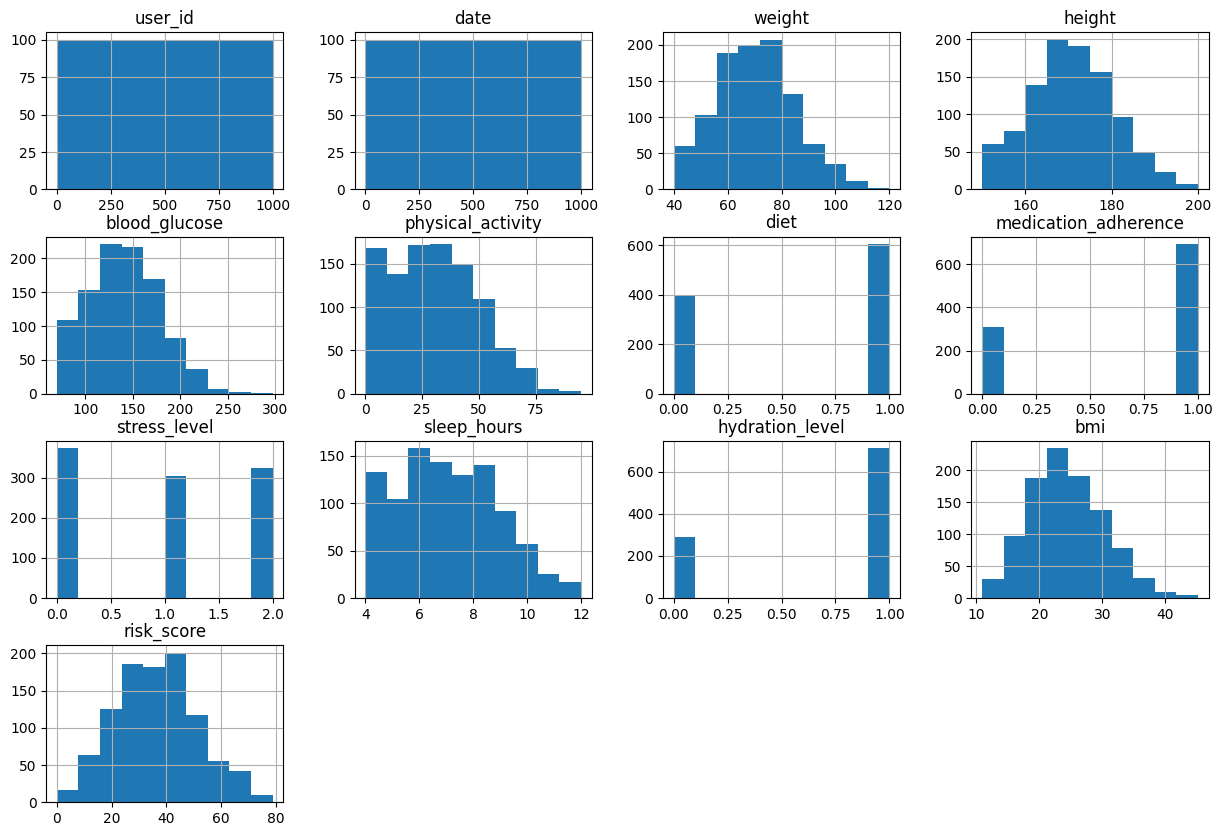

In [231]:
df.hist(figsize=(15,10))
plt.get_figlabels()
plt.show()

Mục tiêu của đầu ra là nguy cơ mắc bệnh/ nguy cơ có bệnh là cao.    
* Input: .....
* Output: rick_score    
--> Phân loại tỷ lệ mắc bênh (rick_score >=30): Có khả năng cao, ngược lại là khả năng thấp hoặc không có khả năng.

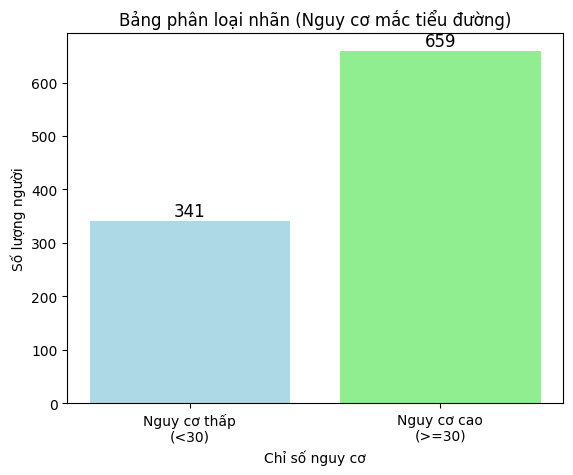

In [232]:
# Phân loại khả năng mắc tiểu đường
sick=np.sum(df['risk_score']>=30)
disease_free=np.sum(df['risk_score']<30)

# Vẽ biểu đồ cột
categories=['Nguy cơ thấp\n(<30)','Nguy cơ cao\n(>=30)']
values=[disease_free,sick]

fig,ax=plt.subplots()
bars=ax.bar(categories,
            values,
            color=['lightblue','lightgreen'])

# Thêm tiêu đề cho nhãn
plt.title('Bảng phân loại nhãn (Nguy cơ mắc tiểu đường)')
plt.xlabel('Chỉ số nguy cơ')
plt.ylabel('Số lượng người')

# Hiển thị số lượng lên từng cột
for bar in bars:
    yval=bar.get_height()
    ax.text(bar.get_x() +bar.get_width()/2,
            yval+1,
            str(int(yval)),
            ha='center',
            va='bottom',
            fontsize=12
            )
plt.show()

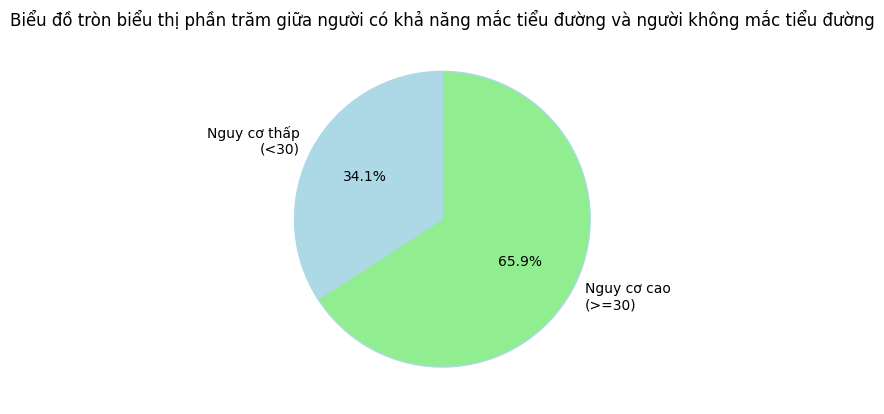

In [233]:
# Vẽ biểu đồ tròn biểu thị phần trăm của sản phẩm
fig,ax=plt.subplots()
ax.pie(values,
       labels=categories,
       autopct='%1.1f%%',
       startangle=90,
       colors=['lightblue','lightgreen'],
       wedgeprops={'edgecolor':'lightblue'}
)

plt.title('Biểu đồ tròn biểu thị phần trăm giữa người có khả năng mắc tiểu đường và người không mắc tiểu đường')
plt.show()

C:\Users\vanho\AppData\Local\Temp\ipykernel_8588\3327391718.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['weight'],shade=True,color='b')


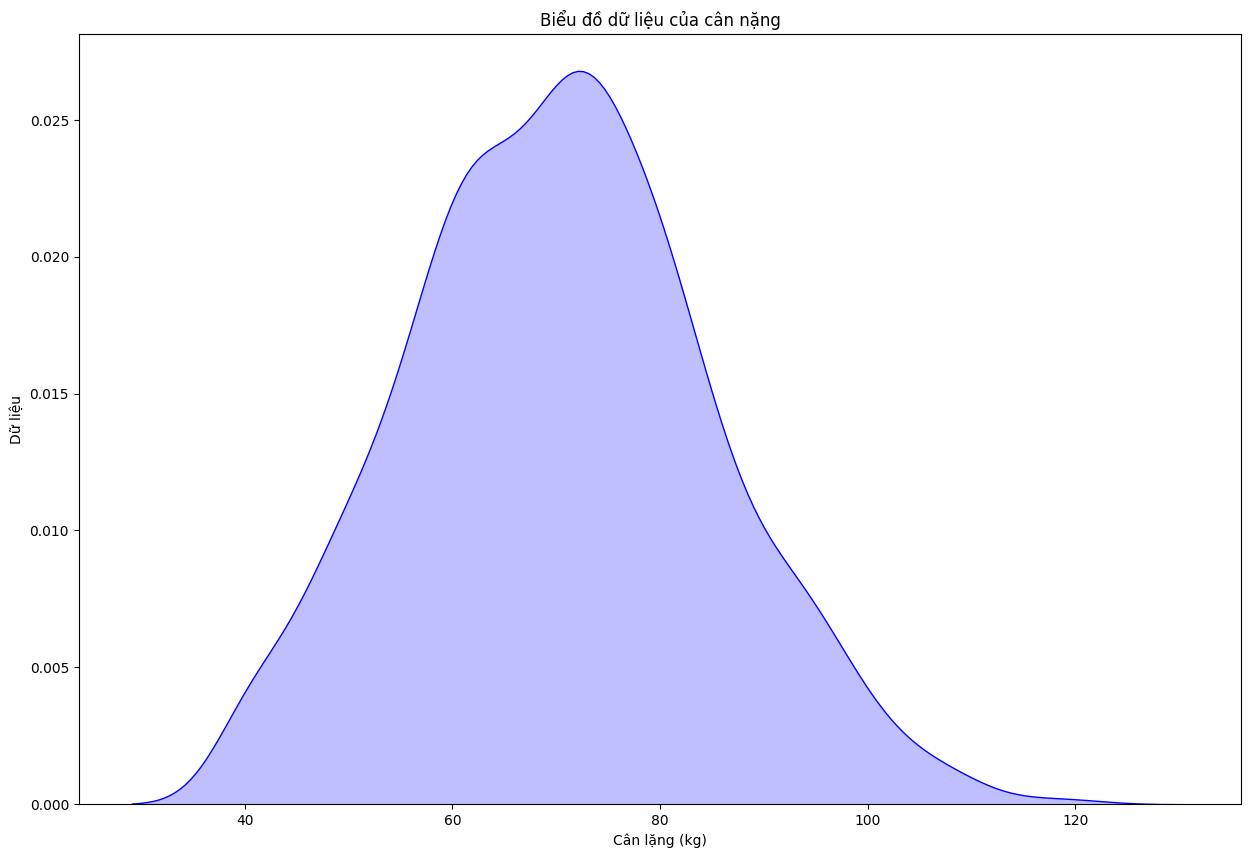

In [235]:
plt.figure(figsize=(15,10))
sns.kdeplot(df['weight'],shade=True,color='b')
plt.title('Biểu đồ dữ liệu của cân nặng')
plt.xlabel('Cân lặng (kg)')
plt.ylabel('Dữ liệu')
plt.show()

C:\Users\vanho\AppData\Local\Temp\ipykernel_8588\474403173.py:2: FutureWarning: 

`shade` is now deprecated in favor of `fill`; setting `fill=True`.
This will become an error in seaborn v0.14.0; please update your code.

  sns.kdeplot(df['height'],shade=True,color='b')


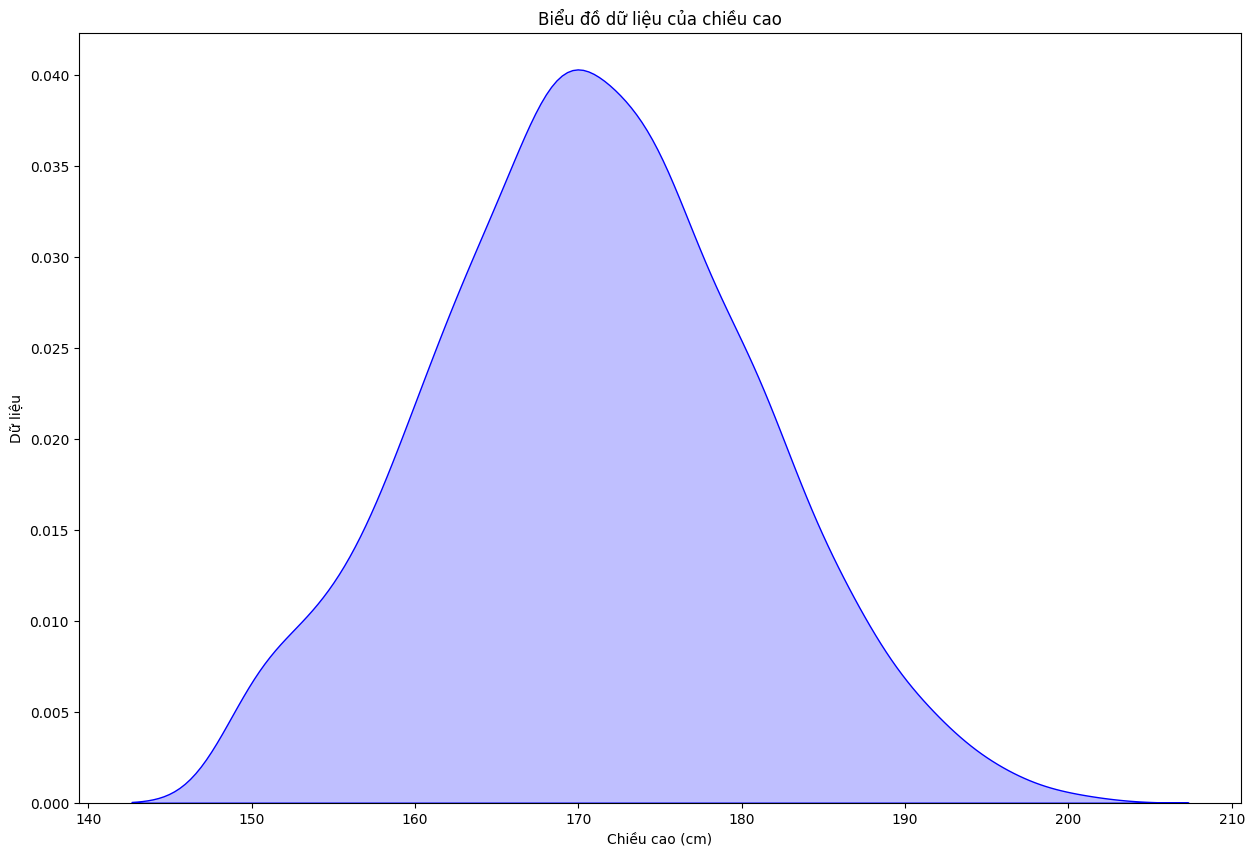

In [236]:
plt.figure(figsize=(15,10))
sns.kdeplot(df['height'],shade=True,color='b')
plt.title('Biểu đồ dữ liệu của chiều cao')
plt.xlabel('Chiều cao (cm)')
plt.ylabel('Dữ liệu')
plt.show()

# Tiền sử lý dữ liệu

In [237]:
X=df.drop(columns='risk_score')
y=df['risk_score']

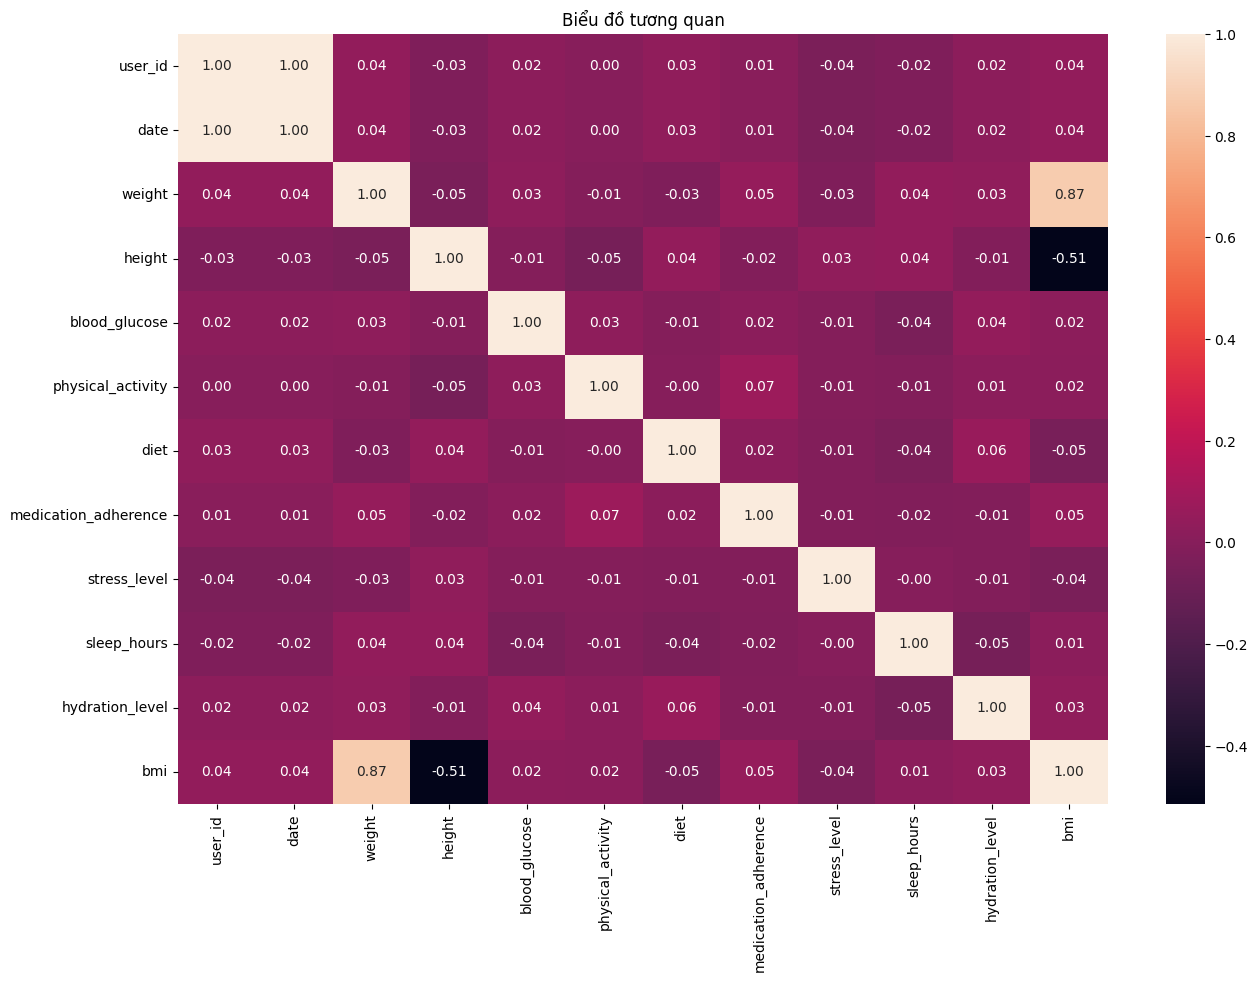

In [238]:
correlation_matrix=X.corr()
plt.figure(figsize=(15,10))
sns.heatmap(correlation_matrix,annot=True,fmt=".2f",cbar=True)
plt.title("Biểu đồ tương quan")
plt.show()

Áp dụng phương pháp "smote" nhằm cân bằng dữ liệu nhãn (label)

In [239]:
# Handing data imbalance
def augment_data(X, y, method='smote'):
  if method == 'smote':
    sampler = SMOTE(random_state=10)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  elif method == 'randomoversampler':
    sampler = RandomOverSampler(random_state=11)
    X_resampled, y_resampled = sampler.fit_resample(X, y)

  return X_resampled, y_resampled

def plot_class_distribution(y_train):
  class_distribution = pd.Series(y_train).value_counts()

  plt.figure(figsize=(15, 10))
  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')
  plt.title('Phân phối dữ liệu mẫu ')
  plt.xlabel('Lớp')
  plt.ylabel('Số lượng mẫu')
  plt.show()

In [240]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

Training set size: (1044, 12)



C:\Users\vanho\AppData\Local\Temp\ipykernel_8588\641290355.py:17: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=class_distribution.index, y=class_distribution.values, palette='viridis')


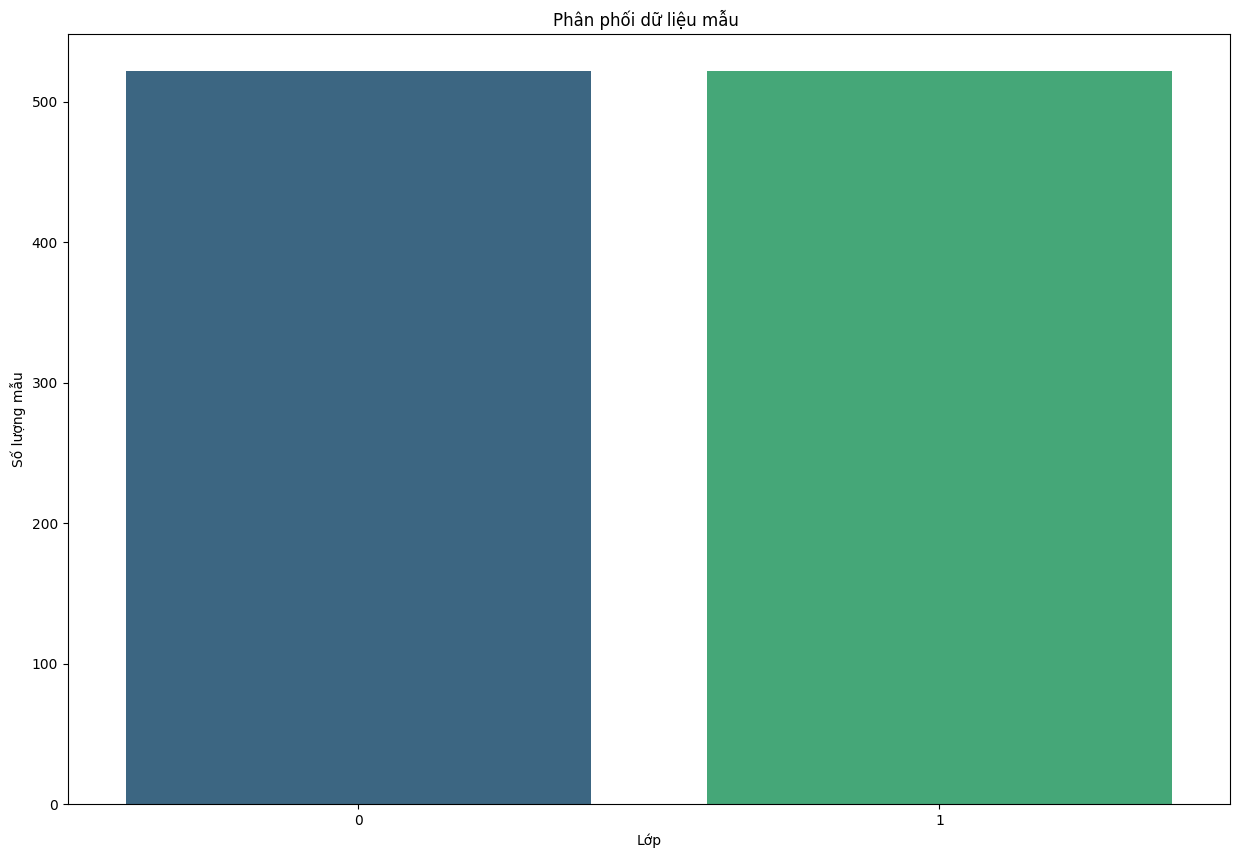

In [241]:
X_train_smote, y_train_smote = augment_data(X_train, y_train, method='smote')

print(f"Training set size: {X_train_smote.shape}\n")
plot_class_distribution(y_train_smote)

# Huấn luyện mô hình

Hàm Train_KFold: Thực hiện quá trình huấn luyện mô hình với kỹ thuật K-Fold Cross-Validation.   
Sau đó tính toán và in ra độ chính xác (accuracy_score) trên mỗi lần chia và trung bình cho tất cả các lần

In [242]:
def Train_KFold(model, X, y, k=5):
    kf = KFold(n_splits=k, shuffle=True, random_state=10)
    scores = []

    for train_index, test_index in kf.split(X):
        # Split data
        X_train, X_test = X[train_index], X[test_index]
        y_train, y_test = y[train_index], y[test_index]

        # Training model
        model.fit(X_train, y_train)

        # Predict on the test set of each k-fold
        y_pred = model.predict(X_test)
        score = accuracy_score(y_test, y_pred)
        scores.append(score)

    print(f"Accuracy on each fold: {scores}")
    print(f"Mean accuracy: {round(sum(scores) / len(scores)*100, 2)}%\n")
    return model

Hàm Gridsearch_params: Triểu khai kỹ thuật Grid Search để tối ưu hóa các siêu tham số của mô hình dựa trên độ chính xác (accuracy_score)

In [243]:
def Gridsearch_params(model, param_grid, X, y):
    grid_search = GridSearchCV(
        estimator=model,
        param_grid=param_grid,
        scoring='accuracy',
        cv = 5,
        verbose=1,  
        n_jobs=-1  
    )
    grid_search.fit(X, y)
    # Get the best model
    best_model = grid_search.best_estimator_

    print("Best parameters found:", grid_search.best_params_)
    print("Best mean accuracy:", round(grid_search.best_score_ * 100, 2), "%\n")
    
    return best_model

Hàm evolution_models: dùng để đánh giá mô hình

In [244]:
def evolution_models(model, X_test, y_test, average='weighted'):
    # Dự đoán nhãn
    y_pred = model.predict(X_test)
    
    # Báo cáo phân loại
    print("Classification Report:")
    print(classification_report(y_test, y_pred))
    print("------------------------------------------")

    # Các chỉ số trọng số trung bình
    print(f"Recall : {recall_score(y_test, y_pred, average=average):0.4f}")
    print(f"Precision : {precision_score(y_test, y_pred, average=average):0.4f}")
    print(f"F1 score : {f1_score(y_test, y_pred, average=average):0.4f} \n")   

    # Ma trận nhầm lẫn
    labels = sorted(set(y_test))
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=labels, yticklabels=labels)
    plt.title("Confusion matrix heatmap:")
    plt.xlabel("Predicted labels")
    plt.ylabel("Actual labels")
    plt.show()
    
    # Lưu hình ảnh ma trận nhầm lẫn
    plt.savefig("confusion_matrix.png")
    print("Confusion matrix heatmap saved as 'confusion_matrix.png'.")


Mô hình Logistic Regression

In [245]:
lr = LogisticRegression(penalty='l2', C=10, random_state=42)
lr.fit(X_train, y_train)

# Đánh giá mô hình
evolution_models(lr, X_test, y_test, average='macro')

Classification Report:


d:\VisualCode\Python3.12.4\Filedownload\Lib\site-packages\sklearn\utils\_array_api.py:390: RuntimeWarning: invalid value encountered in cast
  return x.astype(dtype, copy=copy, casting=casting)


ValueError: Input y_true contains NaN.